# **QSAR Model Building of IDO1 Inhibitors**


# Read in data

In [1]:
import pandas as pd

In [5]:

dataset = pd.read_csv("/content/bioactivity_data_3class_pIC50_pubchem_fp.csv")
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.552842
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.290730
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.010550
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.442493
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.086186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.823909
3402,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.337242
3403,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.443697
3404,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909


In [6]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3402,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3403,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3404,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = dataset.iloc[:,-1]
Y

0       6.552842
1       6.290730
2       6.010550
3       6.442493
4       7.086186
          ...   
3401    8.823909
3402    8.337242
3403    8.443697
3404    7.823909
3405    6.958607
Name: pIC50, Length: 3406, dtype: float64

# Remove low variance features

In [8]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP813,PubchemFP814,PubchemFP818,PubchemFP819,PubchemFP821
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,1,1,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1,1,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,1,1,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,1,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,0,0,1,1,0
3402,1,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,0,0,1,1,0
3403,1,1,1,1,1,0,0,0,0,0,...,0,0,1,1,1,0,0,1,1,0
3404,1,1,0,1,1,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [9]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.830458539960713

## Model Prediction

In [12]:
Y_pred = model.predict(X)
Y_pred

array([6.31571202, 6.098246  , 5.97551585, ..., 7.78020723, 7.19264131,
       7.78020723])

## Model Performance

In [13]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.37
Coefficient of determination (R^2): 0.83


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

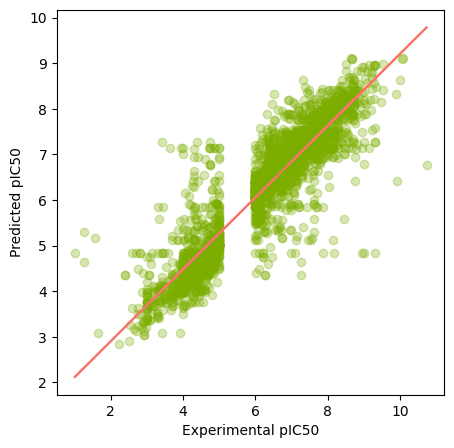

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [16]:
import pickle

In [18]:
pickle.dump(model, open('IDO1_model.pkl', 'wb'))